### Capstone 2 - Narrative Analytics and Experimentation

[Dataset](https://www.phoenixopendata.com/dataset/crime-data) downloaded on 9/25/2019 from the City of Phoenix Open Data Portal.  Includes crime data from 2016 to the present.

#### General Structure
1. Analysis that highlights your experimental hypothesis.
    - I have identified the top 5 zip codes that motor vehicle thefts take place in.  Additionaly I have identified the months of the year and the hours of the day associated with the highest number of motor vehicle thefts.
    - I propose that additional police intervention within the highest risk zip codes, at the highest risk times of the day, during the highest risk month of the year will result in a reduction in the number of vehicle thefts within the the highest risk zip codes.
1. A rollout plan showing how you would implement and rollout the experiment
    - I propose to increase the police presence in the top 5 zip codes by 10% during the periods of the day and the month of the year when vehicle thefts are most likely to take place
1. An evaluation plan showing what constitutes success in this experiment
    - compare vehicle theft volumes in each of the top 5 zip codes after implementing the experiement with theft volumes before the experiment
    - if the decrease in theft volumes is statistically significant, then this experiment would be proved successful.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
%matplotlib inline 
plt.style.use('bmh')
# pd.options.display.max_rows = 999
pd.options.display.float_format = '{:.0f}'.format

In [3]:
# read in csv files
df = pd.read_csv('crime-data_crime-data_crimestat.csv', low_memory=False)

In [4]:
# convert column labels to lower case and remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')
df.columns = map(str.lower, df.columns)

In [5]:
df.head()

,inc_number,occurred_on,occurred_to,ucr_crime_category,100_block_addr,zip,premise_type
0,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE
1,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE
2,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE
3,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT
4,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE


In [6]:
df.dtypes

inc_number             object
occurred_on            object
occurred_to            object
ucr_crime_category     object
100_block_addr         object
zip                   float64
premise_type           object
dtype: object

In [7]:
# change date and time columns to datetime format
df.occurred_on = pd.to_datetime(df.occurred_on)
df.occurred_to = pd.to_datetime(df.occurred_to)

In [8]:
# add datetime features
df['occ_on_month'] = df['occurred_on'].dt.month
df['occ_on_year'] = df['occurred_on'].dt.year

In [9]:
# how large is the dataset
df.shape

(253000, 9)

## 1. Analysis that highlights experimental hypothesis.

#### Motor vehicle thefts occur at a higher rate in some Phoenix zip codes.

In [164]:
# which zip codes are associated with the most vehicle thefts?

df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'zip'] \
    .value_counts().head()

85009    1714
85041    1543
85033    1388
85043    1300
85035    1289
Name: zip, dtype: int64

In [111]:
# how many unique zip codes have vehicle thefts taken place at?

print('The number of unique zip codes that vehicle thefts have taken place at:',

df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'zip'] \
    .value_counts().count())

The number of unique zip codes that vehicle thefts have taken place at: 73


In [109]:
# what percent of vehicle thefts take place within the top 5 zip codes?

print('Percent of vehicle thefts take place within the top 5 zip codes:',

round(df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'zip'] \
    .value_counts().head().sum() / \
df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'zip'] \
    .value_counts().sum(), 2))

Percent of vehicle thefts take place within the top 5 zip codes: 0.27


#### Vehicle thefts are more likely to take place within certain areas within a zip code.

In [35]:
# within zip codes, what premises are associated with the largest number of vehicle thefts?
df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'premise_type'] \
    .value_counts().head()

PARKING LOT                            7092
STREET / ROADWAY / ALLEY / SIDEWALK    4911
SINGLE FAMILY HOUSE                    4175
APARTMENT                              3491
DRIVEWAY                               1883
Name: premise_type, dtype: int64

In [108]:
# what percent of total vehicle thefts take place in parking lots?

print('Percent of total vehicle thefts take place in parking lots:',

round(df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'premise_type'] \
    .value_counts()[0] / \
df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'premise_type'] \
    .value_counts().sum(), 2))

Percent of total vehicle thefts take place in parking lots: 0.27


#### Vehicle thefts are more likely to take place at certain times of the day.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Hours of the Day')]

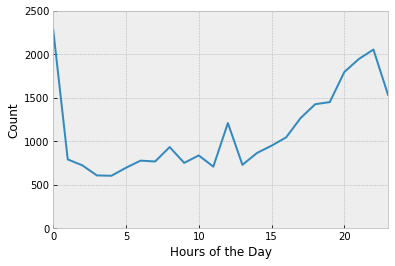

In [100]:
# what time of the day do most vehicle thefts take place at?

pd.options.display.float_format = '{:.0f}'.format
ax = df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_hr'] \
    .value_counts(sort=False).sort_index().plot(ylim=(0, 2500))

ax.set(xlabel="Hours of the Day", ylabel="Count")

In [61]:
# which hours of the day are associated with the highest number of vehicle thefts?

df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_hr'] \
    .value_counts().head()

0     2283
22    2055
21    1947
20    1797
23    1536
Name: occ_on_hr, dtype: int64

In [106]:
# what percent of vehicle thefts take place between 9pm and 11pm?

print('Percent of vehicle thefts take place between 9pm and 11pm:',
      
round(df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_hr'] \
    .value_counts().loc[[21,22]].sum()/ \
df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_hr'] \
    .value_counts().sum(), 2))

Percent of vehicle thefts take place between 9pm and 11pm: 0.15


#### Vehicle thefts are more likely to take place at certain months of the year.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Month of the Year')]

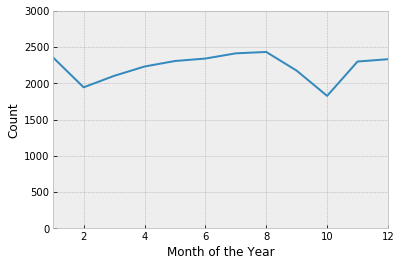

In [101]:
# how does vehicle theft frequency change during the year?
ax = df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_month'] \
    .value_counts().sort_index().plot(ylim=(0, 3000))

ax.set(xlabel="Month of the Year", ylabel="Count")

In [66]:
# which month of the year is associated with the highest occurance of vehicle thefts?

df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_month'] \
    .value_counts().head()

8     2433
7     2414
1     2355
6     2342
12    2333
Name: occ_on_month, dtype: int64

In [117]:
print('Percent of vehicle thefts take place between June and August, the months with the most vehicle thefts:',
round(df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_month'] \
    .value_counts().loc[[6, 7, 8]].sum() / \
df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'occ_on_month'] \
    .value_counts().sum(), 2))

Percent of vehicle thefts take place between June and August, the months with the most vehicle thefts: 0.27


#### Hypothesis:
Null Hypothesis(Ho) = with additional police officers there is no difference between the volume of vehicle thefts that take place within the top 5 zip codes.

Alternative Hypothesis(Ha) = with additional police officers there is a decrease in the number of vehicle thefts that take place within the top 5 zip codes.

## 2. Rollout Plan

During June - August (the months of the year with the highest vehicle thefts), within the top 5 zip codes (85009, 85041, 85033, 85043, 85035) that make up the largest share of vehicle thefts, assign a 10% increase in police offiers to patrol parking lots (the place where most vehicle thefts take place).

## 3. Evaluation Plan.

Compare the volume of vehicle thefts that have taken place between June - August within the top 5 zip codes against the mean volumes of vehicle thefts that have take place within these zip codes during June - August of prior years.

### $$t = \frac{\bar{y_1}-\bar{y_2}}{\sqrt{s^2_1/N_1+s^2_2/N_2}}$$



$\bar{y_1}$ represents the mean of vehicle thefts that have take place between June - August within the top 5 zip codes.

$\bar{y_2}$ represents the historical mean of vehicle thefts that have take place between June - August within the top 5 zip codes.

$s_1$ represents the standard deviation of vehicle thefts that have take place between June - August within the top 5 zip codes.

$s_2$ represents the historical standard deviation of vehicle thefts that have take place between June - August within the top 5 zip codes..

$N_1$ represents the sample size of vehicle thefts that have take place between June - August within the top 5 zip codes.

$N_2$ represents the historical mean sample size of vehicle thefts that have take place between June - August within the top 5 zip codes.

### Success Metric
Mean vehicle thefts within the top 5 zip codes that are lower than mean vehicle thefts of prior years.

#### Prior Years Statistics Computed

In [290]:
# count of vehicle thefts 
# during June, July, and August
# within top 5 zip codes
# across all years of data available

df.loc[(df.ucr_crime_category == 'MOTOR VEHICLE THEFT') & \
       (df.zip.isin(df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'zip'] \
       .value_counts().head().index)) &
       ((df.occ_on_month == 6) | \
       (df.occ_on_month == 7) | \
       (df.occ_on_month == 8))].groupby([df.occ_on_month, df.occ_on_year, df.zip])['occ_on_month'].count().unstack()

zip                       85009.00  85033.00  85035.00  85041.00  85043.00
occ_on_month occ_on_year                                                  
6.00         2016.00            47        27        23        34        15
             2017.00            36        25        26        38        26
             2018.00            34        36        31        26        33
             2019.00            48        35        23        37        40
7.00         2016.00            35        28        20        41        33
             2017.00            35        17        28        36        27
             2018.00            27        45        28        33        30
             2019.00            32        24        27        36        21
8.00         2016.00            38        35        32        32        23
             2017.00            41        24        23        29        23
             2018.00            43        36        26        36        25
             2019.00            28        18        11        37        38

In [341]:
pd.options.display.float_format = '{:.2f}'.format

# filter and compute summary statistics
zip_stats = df.loc[(df.ucr_crime_category == 'MOTOR VEHICLE THEFT') & \
       # filter for only top 5 zips
       (df.zip.isin(df.groupby(df.ucr_crime_category).get_group('MOTOR VEHICLE THEFT').loc[:,'zip'] \
       .value_counts().head().index)) &             
       # filter for only June, July, and August months
       ((df.occ_on_month == 6) | \
       (df.occ_on_month == 7) | \
       (df.occ_on_month == 8))] \
        .groupby([df.occ_on_month, df.occ_on_year, df.zip])['occ_on_month'].count() \
        .groupby(level=2).agg(['mean', 'std', 'sum'])

In [293]:
zip_stats.rename(columns={'sum': 'sample_size', 'std': 'standard_deviation'}, inplace=True)

In [280]:
zip_agg = zip_stats[['mean','standard_deviation','sample_size']].mean().to_frame()

In [281]:
zip_agg.rename(columns={0: 'historical'}, inplace=True)

In [346]:
zip_agg.loc['mean', 'study_results'] = 'y2'
zip_agg.loc['standard_deviation', 'study_results'] = 's2'
zip_agg.loc['sample_size', 'study_results'] = 'N2'

In [347]:
zip_agg

,historical,study_results
mean,30.68,y2
standard_deviation,6.40,s2
sample_size,368.20,N2


### $$t = \frac{{\bar{y_2}-30.68}}{\sqrt{s^2_2/N_2+6.40^2/368}}$$


Evaluate the mean quantity of reported vehicle thefts that have taken place within the top 5 zip codes.  If the mean quantity is greater than the mean of prior year, the test has failed.

If, on the other hand, the mean quantity of vehicle thefts is lower than in prior years - use a paired sample t-test with a significance level of .05, and a one-tail t-distribution table.  If the p-value is less than .05, we have determined the reduction in vehicle thefts is strong enough to preclude the reduction from happening by chance.  We can conclude that the experiment has been a success.

### Secondary Metrics
1. Do the people who are stealing cars simply move into different areas of town?  Does the volume of vehicle thefts in zip codes other than those that have had an increase in policing change significantly?

1. The number of people caught while attempting to steal cars.  This number may increase sharply at the beginning of August within the top 5 zip codes, and taper towards the end of the month as the vehicle thiefs may notice the increased the police presence and modify their behavior accordingly (possibly moving to other areas of town, as a result this metric may be related to the above metric).

